In [141]:
import os

from diff_viz import msd
from diff_viz import diffusion_modes
from diff_viz import feature_distribution_plots
from diff_viz import data_loading
from diff_viz import diff_utils
import pandas as pd
from os import getcwd, chdir
from diff_predictor import data_process
from diff_viz import diff_utils
import matplotlib.pyplot as plt
import numpy as np
import diff_classifier

from diff_viz.heatmaps import plot_heatmap, plot_scatterplot, plot_trajectories
from diff_viz.viscosity import viscosity_from_diffusion_coefficient

In [3]:
agarose_data_path = '/Users/nelsschimek/Documents/nancelab/Data/agarose/'

In [4]:
agarose_files = os.listdir(agarose_data_path)
agarose_files

['features_072623_Agarose_4mgml_40nm_vid_1.csv',
 'features_072623_Agarose_10mgml_40nm_vid_2.csv',
 'features_072623_Agarose_4mgml_40nm_vid_2.csv',
 'features_072623_Agarose_10mgml_40nm_vid_1.csv',
 'features_072623_Agarose_4mgml_40nm_vid_3.csv',
 '.DS_Store',
 'msd_072623_Agarose_4mgml_40nm_vid_3.csv',
 'msd_072623_Agarose_4mgml_40nm_vid_2.csv',
 'msd_072623_Agarose_4mgml_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_4.csv',
 'msd_072623_Agarose_10mgml_40nm_vid_2.csv',
 'msd_072623_Agarose_10mgml_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_2.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_3.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_1.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_2.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_3.csv',
 'features_072623_Agarose_8mgml_40nm_vid_4.csv',
 'msd_072623_Agarose_12mgml_60x_40nm_vid_2.csv',
 'msd_072623_Agarose_12mgml_60x_40nm_vid_3.csv',
 'features_072623_Agarose_8mgml_

In [5]:
msd_agarose_4 = [file for file in agarose_files if 'msd' in file and '4mgml' in file]
feature_agarose_4 = [file for file in agarose_files if 'features' in file and '4mgml' in file]

msd_agarose_8 = [file for file in agarose_files if 'msd' in file and '8mgml' in file]
feature_agarose_8 = [file for file in agarose_files if 'features' in file and '8mgml' in file]

msd_agarose_10 = [file for file in agarose_files if 'msd' in file and '10mgml' in file]
feature_agarose_10 = [file for file in agarose_files if 'features' in file and '10mgml' in file]

msd_agarose_12 = [file for file in agarose_files if 'msd' in file and '12mgml' in file]
feature_agarose_12 = [file for file in agarose_files if 'features' in file and '12mgml' in file]

print(len(msd_agarose_4))   
print(len(feature_agarose_4))
print(len(msd_agarose_8))
print(len(feature_agarose_8))
print(len(msd_agarose_10))
print(len(feature_agarose_10))
print(len(msd_agarose_12))
print(len(feature_agarose_12))

3
3
4
4
2
2
3
3


In [6]:
def get_mean_geo_data(msd_files, filepath=None):
    """takes in a list of msd files and returns the mean of the geometric means and geometric standard errors

    Args:
        msd_files (list of string): files to average

    Returns:
        numpy array: averaged values across multiple CSVs
    """
    geo_means = []
    geo_sems = []
    
    for file in msd_files:
        msd_data = pd.read_csv(filepath+file)
        geo_mean, geosem = msd.get_geo_data(msd_data)
        geo_means.append(geo_mean)
        geo_sems.append(geosem)

    averaged_geo_means = np.mean(geo_means, axis=0)
    averaged_geo_sems = np.mean(geo_sems, axis=0)
    return averaged_geo_means, averaged_geo_sems

In [7]:
list_msd_agarose_4 = []
list_msd_agarose_8 = []
list_msd_agarose_10 = []
list_msd_agarose_12 = []

for file in msd_agarose_4:
    msd_data = pd.read_csv(agarose_data_path + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_agarose_4.append(np.array(geo_mean))

for file in msd_agarose_8:
    msd_data = pd.read_csv(agarose_data_path + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_agarose_8.append(np.array(geo_mean))

for file in msd_agarose_10:
    msd_data = pd.read_csv(agarose_data_path + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_agarose_10.append(np.array(geo_mean))

for file in msd_agarose_12:
    msd_data = pd.read_csv(agarose_data_path + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_agarose_12.append(np.array(geo_mean))
    

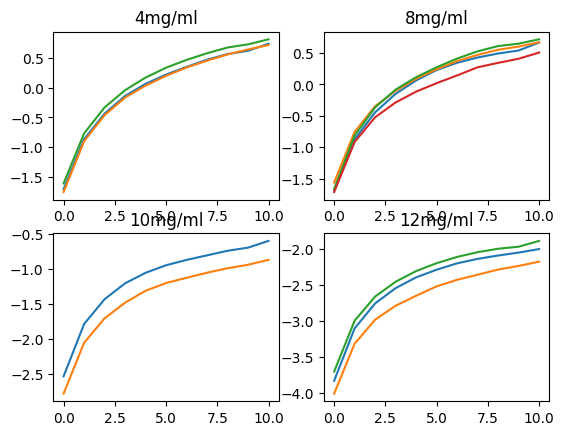

In [8]:
fig, ax = plt.subplots(2, 2)

for file in list_msd_agarose_4:
    ax[0,0].plot(file[1:12])
    ax[0,0].set_title('4mg/ml')
for file in list_msd_agarose_8:
    ax[0,1].plot(file[1:12])
    ax[0,1].set_title('8mg/ml')
for file in list_msd_agarose_10:
    ax[1,0].plot(file[1:12])
    ax[1,0].set_title('10mg/ml')
for file in list_msd_agarose_12:
    ax[1,1].plot(file[1:12])
    ax[1,1].set_title('12mg/ml')
# ax[0, 0].plot(list_msd_agarose_4)
# ax[0, 1].plot(list_msd_agarose_8)
# ax[1, 0].plot(list_msd_agarose_10)
# ax[1, 1].plot(list_msd_agarose_12)

In [9]:
mgml4_geomean, mgml4_geosem = get_mean_geo_data(msd_agarose_4, filepath=agarose_data_path)
mgml8_geomean, mgml8_geosem = get_mean_geo_data(msd_agarose_8, filepath=agarose_data_path)
mgml10_geomean, mgml10_geosem = get_mean_geo_data(msd_agarose_10, filepath=agarose_data_path)
mgml12_geomean, mgml12_geosem = get_mean_geo_data(msd_agarose_12, filepath=agarose_data_path)

In [10]:
geo_mean_df = pd.DataFrame({'4mg/ml': mgml4_geomean, '8mg/ml': mgml8_geomean, '10mg/ml': mgml10_geomean, '12mg/ml': mgml12_geomean})
geo_sem_df = pd.DataFrame({'4mg/ml': mgml4_geosem, '8mg/ml': mgml8_geosem, '10mg/ml': mgml10_geosem, '12mg/ml': mgml12_geosem})
geo_mean_df

,4mg/ml,8mg/ml,10mg/ml,12mg/ml
0,NaN,NaN,NaN,NaN
1,-1.687666,-1.659860,-2.655078,-3.847608
2,-0.845297,-0.840324,-1.917746,-3.138294
3,-0.411319,-0.420409,-1.565554,-2.800341
4,-0.118674,-0.155629,-1.340128,-2.596717
...,...,...,...,...
646,NaN,NaN,-1.355615,-1.980606
647,NaN,NaN,-1.389679,-2.046715
648,NaN,NaN,-1.383661,-2.044924
649,NaN,NaN,-1.536979,-2.039279


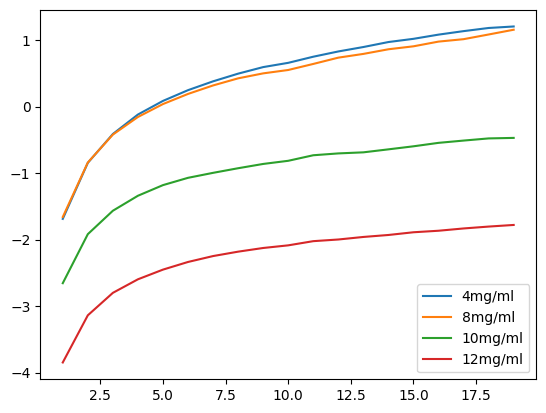

In [11]:
plt.plot(geo_mean_df['4mg/ml'][0:20], label='4mg/ml')
plt.plot(geo_mean_df['8mg/ml'][0:20], label='8mg/ml')
plt.plot(geo_mean_df['10mg/ml'][0:20], label='10mg/ml')
plt.plot(geo_mean_df['12mg/ml'][0:20], label='12mg/ml')

plt.legend()


In [12]:
def testing_msd_viz(doses,geomean_df,geosem_df,fps):
    """
    Visualize MSD data from diffusivity experiments.
    
    Parameters
    ----------
        doses (list):
            List of doses used in the experiment.
        geomean_df (pandas.DataFrame):
            DataFrame containing the mean-squared displacement data.
        geosem_df (pandas.DataFrame):
            DataFrame containing the standard error of the mean-squared displacement data.
        fps (int):
            Frames per second of the experiment.

    Returns
    -------
        fig (matplotlib.figure.Figure):
            Figure containing the MSD data.

    """
    count=0
    msd_dose_list=diff_utils.get_df_dose_list(doses,geomean_df)
    sem_dose_list=diff_utils.get_df_dose_list(doses,geosem_df)
    
    if len(doses)==1:
        tau=geomean_df.index.values/651
        fig,ax=plt.subplots(figsize=(6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        handles=list(geomean_df.columns)
        #print('tau',tau)
        print('geomean_df[handle]', geomean_df[handles[0]]/2)#+geosem_df[handles[0]]/2)
        #print('geosem_df[handle]',geosem_df[handle])
    
        for handle in handles:
            ax.loglog(tau,geomean_df[handle])
            ax.set_xlabel('Lag time (s)',fontsize=16)
            ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
            
            
            ax.fill_between(tau,geomean_df[handle]+geosem_df[handle]/2,geomean_df[handle]-geosem_df[handle]/2,cmap='ocean',alpha=0.2)
            #ax.legend(handles,loc='best')
            #ax.set_xlim([0.008, 0.2])
            #ax.set_ylim([0.008,1])
            #ax.set_title(f'\n{doses[c]}\n', fontsize=16)
         
    else:                
        tau=geomean_df.index.values/651
        #fig,axes=plt.subplots(nrows=1,ncols=len(doses),figsize=(len(doses)*6,6))
        fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(len(doses)*6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        count=0
        
        for c in np.arange(0,len(doses)):
            while count<=c:
                sem_handles = list(sem_dose_list[c].columns)
                msd_handles = list(msd_dose_list[c].columns)
                print(msd_dose_list[count].values.flatten().shape)
                #print(msd_dose_list[count]+sem_dose_list[count]/2)
                axes.loglog(tau,msd_dose_list[count], label=doses[c])
                axes.fill_between(tau,
                                    (msd_dose_list[count]+sem_dose_list[count]/2).values.flatten(),
                                    (msd_dose_list[count]-sem_dose_list[count]/2).values.flatten(),
                                    cmap='ocean',
                                    alpha=0.2)
                axes.set_xlabel('\nLag time (s)',fontsize=16)               
                

                #axes[c].set_xlim([0.008, 1])
                #axes[c].set_ylim([0.008,1])
                axes.set_title(f'\n{doses[c]}\n', fontsize=16)
    
                if c == 0:
                    axes.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    
                count+=1
                axes.legend(loc='best')
    return fig

In [52]:
def msd_viz(doses,geomean_df,df_dose_list):
    count = 0
    
    # if len(doses) == 1:
    #     tau = geomean_df.index.values / 651
    #     fig, ax = plt.subplots(figsize=(5,5))
    #     plt.rcParams.update({'font.family':'helvetica'})
    #     handles = list(geomean_df.columns)
    #     #labels = [handle.split(stimulus+'_')[1] for handle in handles] # this wont work
    
    #     for handle in handles:
    #         ax.loglog(tau [0:70],geomean_df[handle][0:70]) #Can take out the 0:70 part to get the whole graph
    #         ax.set_xlabel('Lag time (s)',fontsize=16)
    #         ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    #         #ax.legend(labels,loc='upper left') #this wont either
    #         ax.set_xlim([0.002, 0.05])
    #         ax.set_ylim([0.0009,1.3])
    #         #axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)
    #     ax.legend(handles)

         
   # else:                
    tau = geomean_df.index.values/651
    fig, axes = plt.subplots(nrows=1, ncols=len(doses),figsize=(12,6))
    plt.rcParams.update({'font.family':'helvetica'})
    count=0
    
    for c in np.arange(0,len(doses)):
        handles = list(df_dose_list[c].columns)
        times = []
        handles = list(df_dose_list[c].columns)
        #labels = [handle.split(stimulus+'_')[1] for handle in handles]
        axes[c].loglog(tau[0:70],df_dose_list[count][0:70])
        axes[c].set_xlabel('\nLag time (s)',fontsize=16)
        #axes[c].legend(labels,loc='best')
        axes[c].set_xlim([0.002, 0.02])
        axes[c].set_ylim([0.0009,10])
        axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)

        if c == 0:
            axes[c].set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)

        count+=1
    return

In [53]:
def get_df_dose_list(doses,geo_df):
    df_dose_list = []
    
    for dose in doses:
        dose_df = pd.DataFrame()
        dose_cols = [col for col in geo_df.columns if dose in col]
        dose_df = geo_df.filter(dose_cols, axis=1)
        df_dose_list.append(dose_df)
        
    return df_dose_list

In [54]:
df_dose_list = get_df_dose_list(['4mg/ml', '8mg/ml', '10mg/ml', '12mg/ml'], geo_mean_df)

## Lets plot MSD plots for each video!

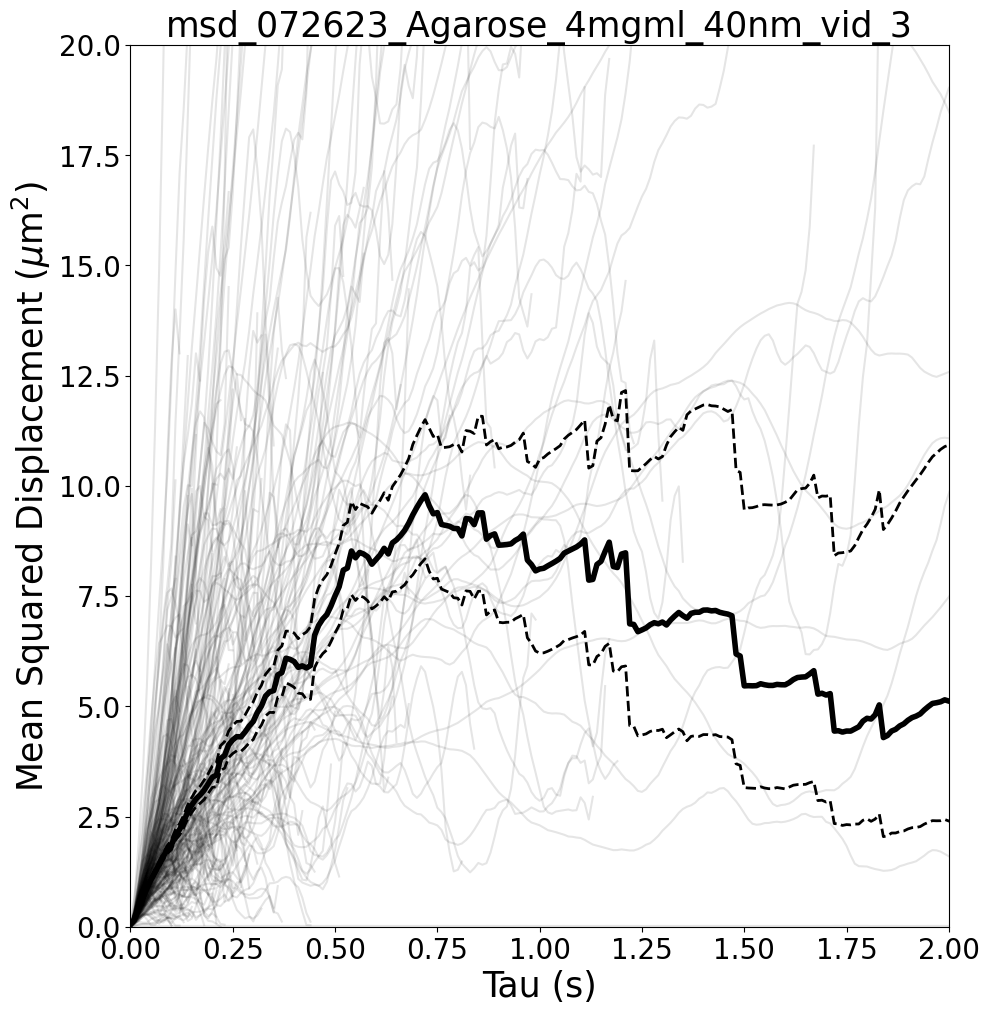

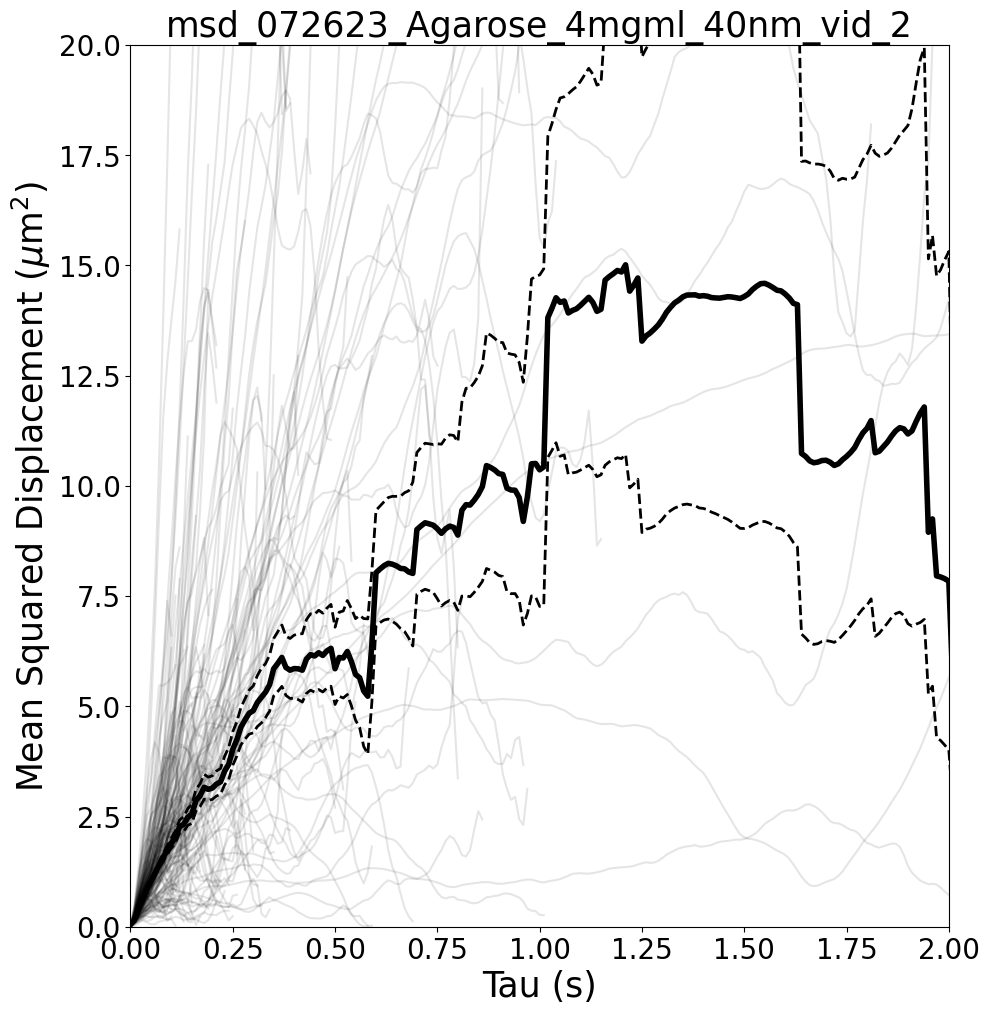

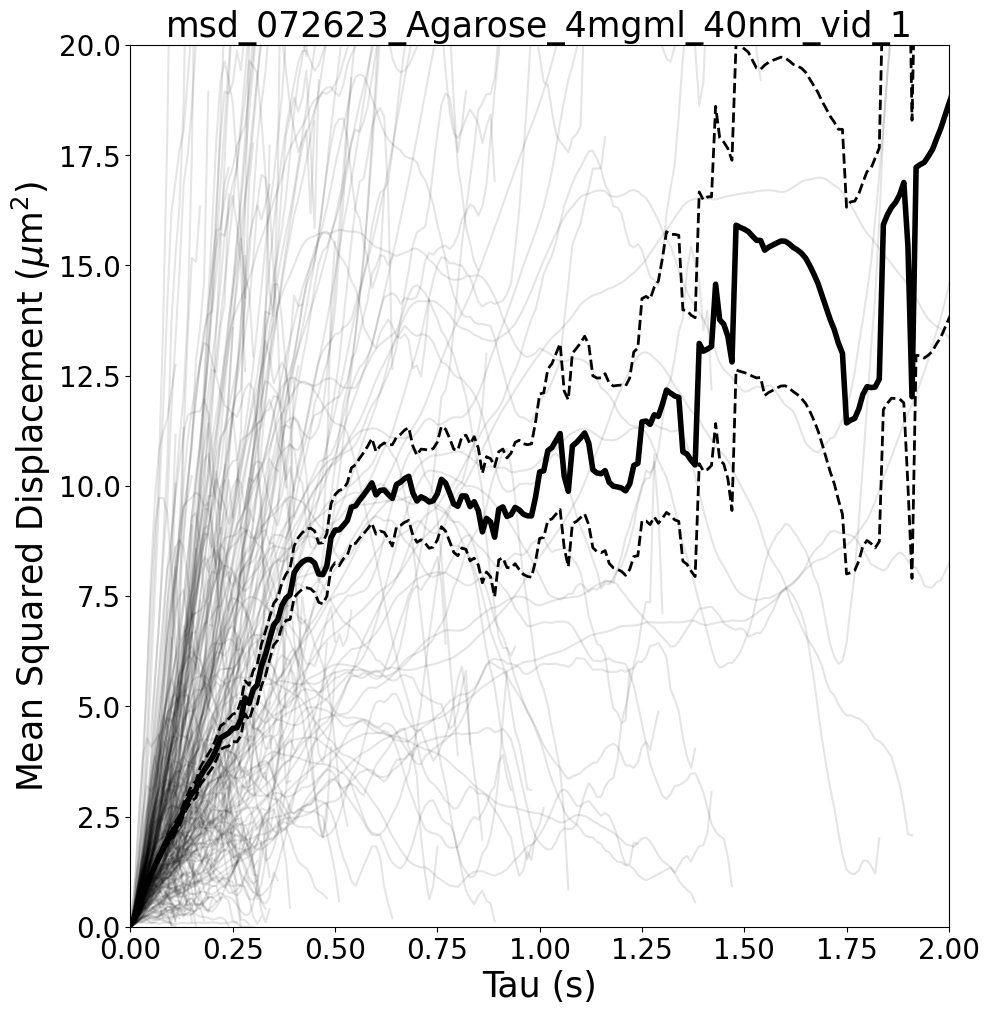

In [31]:
# 4mg/ml data
for file in msd_agarose_4:
    fig = msd.plot_individual_msds(df=pd.read_csv(agarose_data_path + file), x_range=2, y_range=20, title=file[:-4])


In [14]:
len(msd_agarose_4)

3

# Lets do some feature analysis

In [53]:
all_features_list = feature_agarose_4 +feature_agarose_8 +feature_agarose_10 + feature_agarose_12
# for file in all_features_list:
#     file = agarose_data_path + file
mgml4_df = pd.concat([pd.read_csv(agarose_data_path+file) for file in feature_agarose_4])
mgml4_df['target'] = '4mgml'
mgml8_df = pd.concat([pd.read_csv(agarose_data_path+file) for file in feature_agarose_8])
mgml8_df['target'] = '8mgml'
mgml10_df = pd.concat([pd.read_csv(agarose_data_path+file) for file in feature_agarose_10])
mgml10_df['target'] = '10mgml'
mgml12_df = pd.concat([pd.read_csv(agarose_data_path+file) for file in feature_agarose_12])
mgml12_df['target'] = '12mgml'

all_df = pd.concat([mgml4_df, mgml8_df, mgml10_df, mgml12_df])
all_df.shape

(3385, 27)

In [60]:
feature_list = ['alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
]

In [135]:
all_df_cleaned = all_df[~all_df[list(set(feature_list)-set(['Deff2', 'Mean Deff2']))].isin([np.inf, np.nan, -np.inf]).any(axis=1)]
all_df_cleaned.shape

(3256, 27)

In [136]:
all_df_cleaned.max()

Unnamed: 0                        689
Track_ID                        689.0
alpha                       10.336628
D_fit                       65.975944
kurtosis                     26.63363
asymmetry1                        1.0
asymmetry2                   0.989829
asymmetry3                   0.693147
AR                20266198323167232.0
elongation                        1.0
boundedness                  0.549383
fractal_dim                  3.957389
trappedness                 -0.069094
efficiency                   8.542517
straightness                 0.937593
MSD_ratio                   81.990435
frames                          651.0
X                         1022.465837
Y                         1022.629103
Quality                   3068.985688
Mean_Intensity            55117.90455
SN_Ratio                    10.119557
Deff1                       29.165943
Deff                         9.575179
Mu                            0.85643
Deff2                        4.853771
target      

In [108]:
all_df_cleaned['AR'].max()

2.026619832316723e+16

(array([3.199e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.800e+0

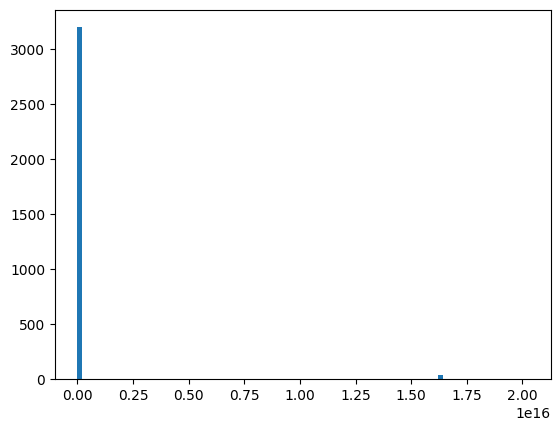

In [71]:
plt.hist(all_df_cleaned['AR'], bins=100)

alpha
D_fit
kurtosis
asymmetry1
asymmetry2
asymmetry3
AR
elongation
boundedness
fractal_dim
trappedness
efficiency
straightness
MSD_ratio
Deff1
Deff2


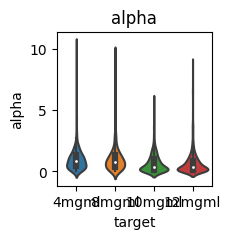

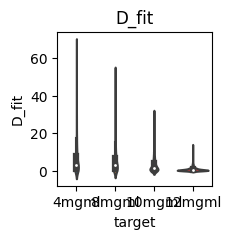

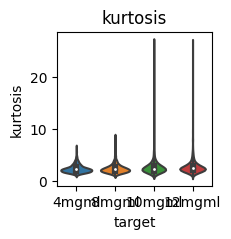

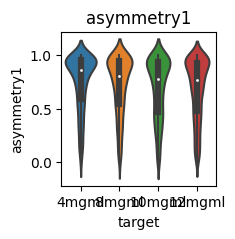

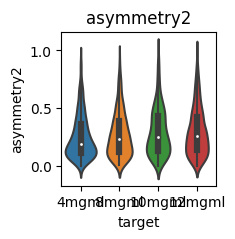

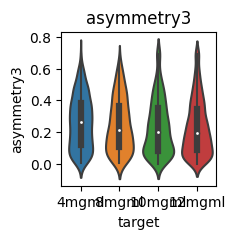

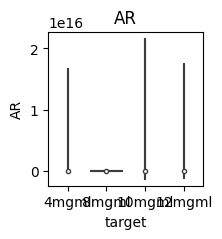

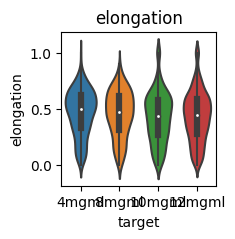

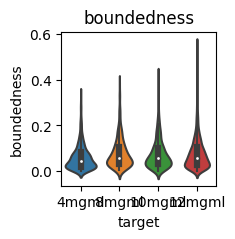

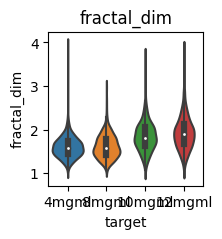

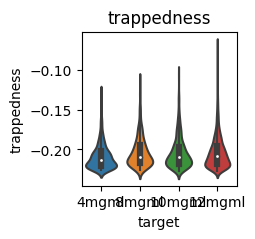

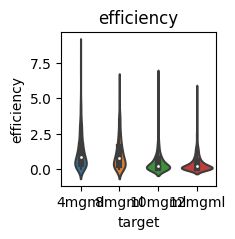

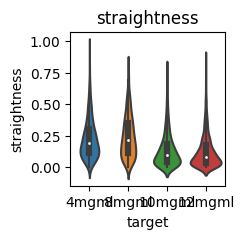

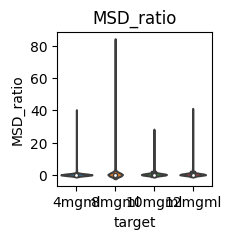

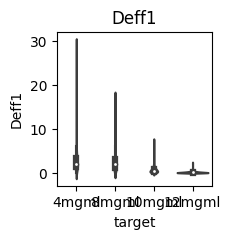

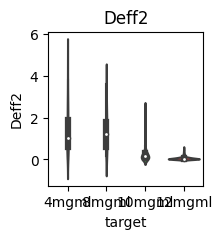

In [138]:
for feature in feature_list:
    print(feature)
    # if feature in ['Deff2', 'AR', 'MSD_ratio']:
    #     pass
    # else:
    #     feature_distribution_plots.feature_violin_plot(all_df_cleaned, feature, 'target', title=feature)
    feature_distribution_plots.feature_violin_plot(all_df_cleaned, feature, 'target', title=feature)

    

<Axes: title={'center': 'Deff1'}, xlabel='target'>

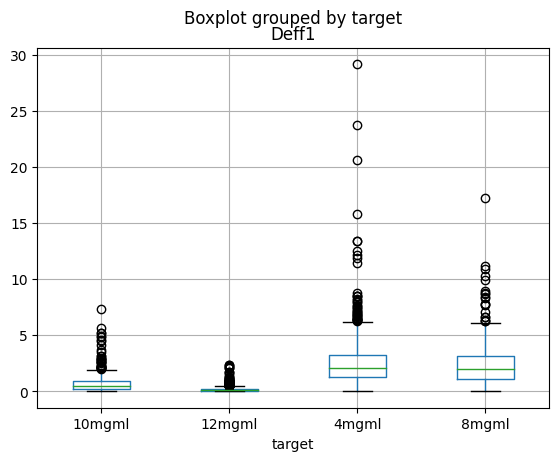

In [131]:
all_df.boxplot('Deff1', by='target')

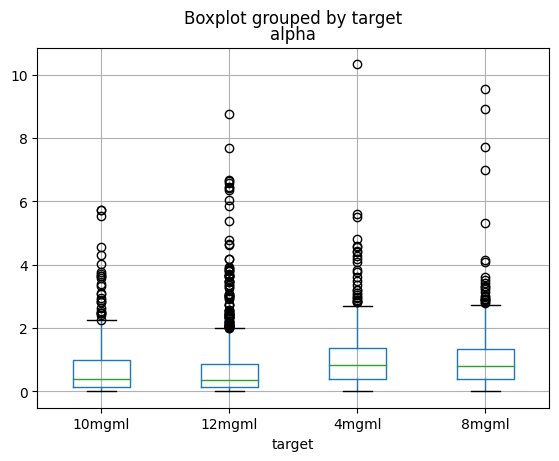

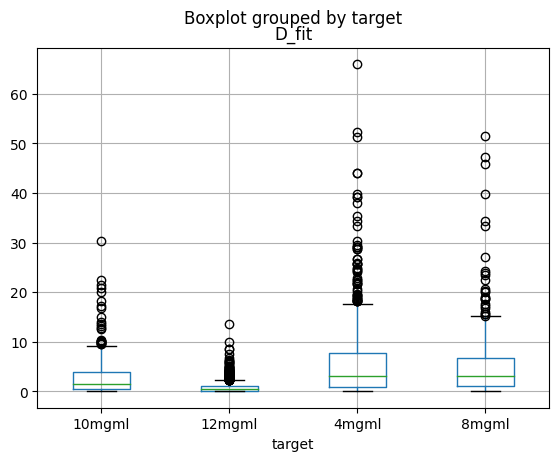

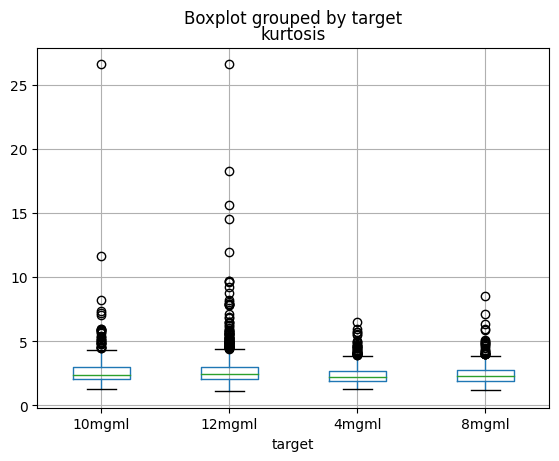

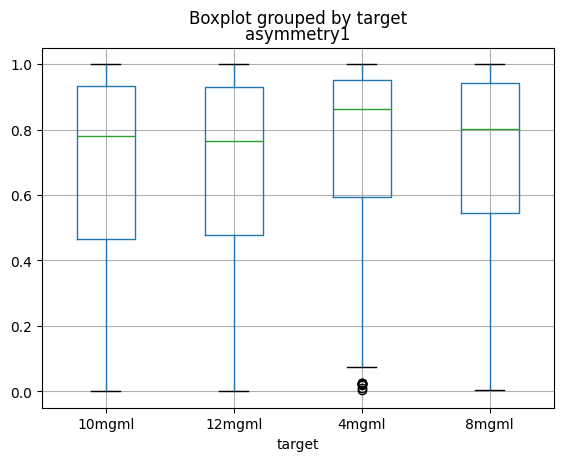

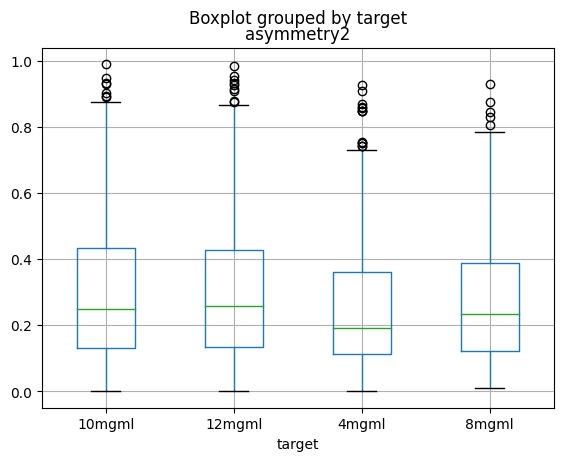

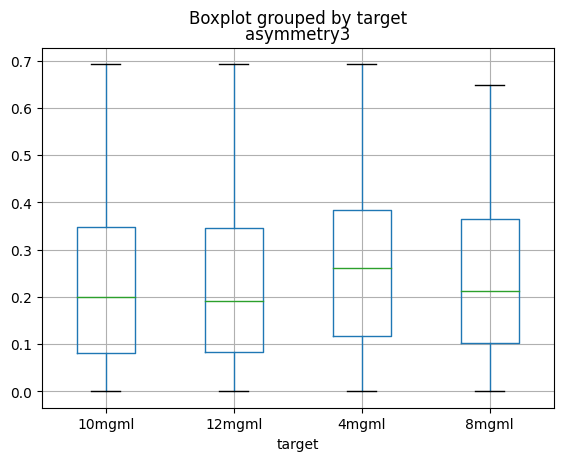

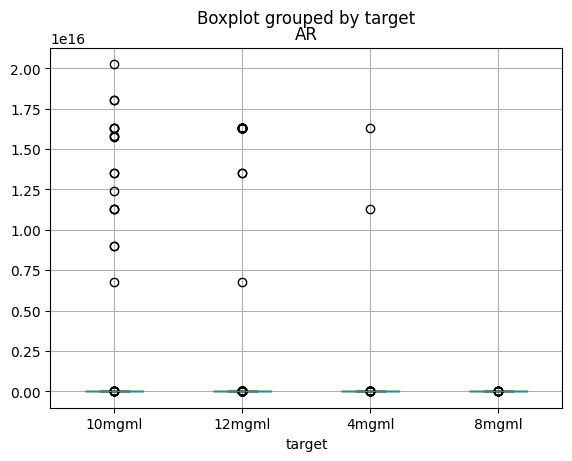

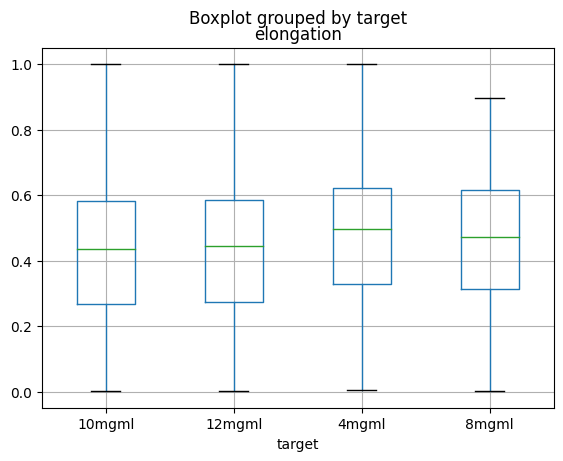

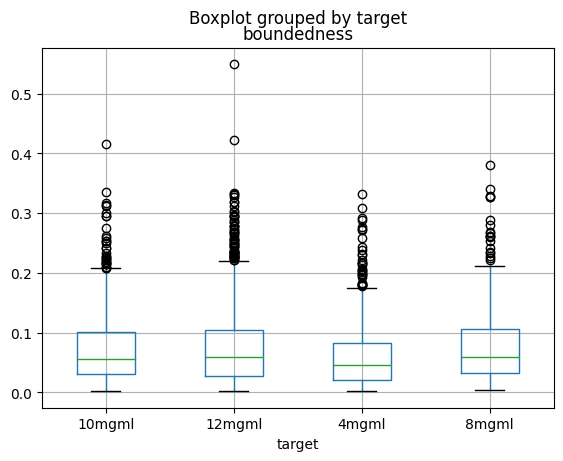

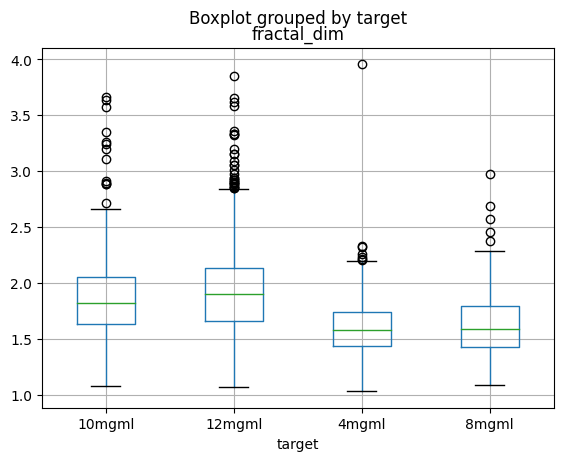

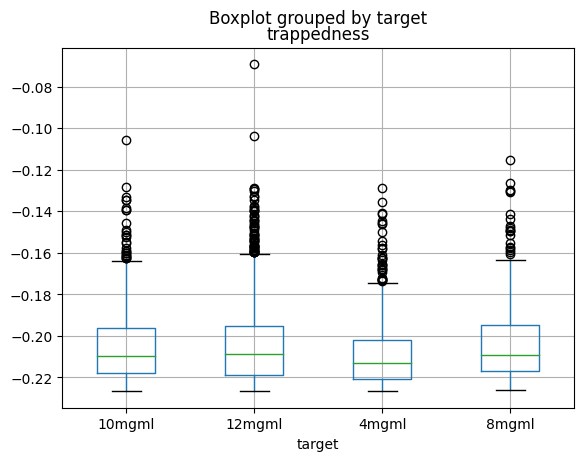

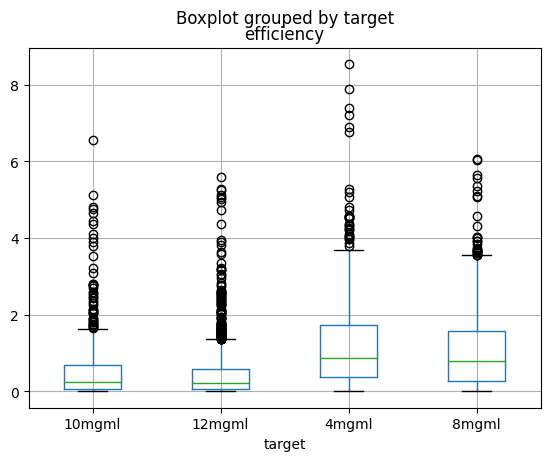

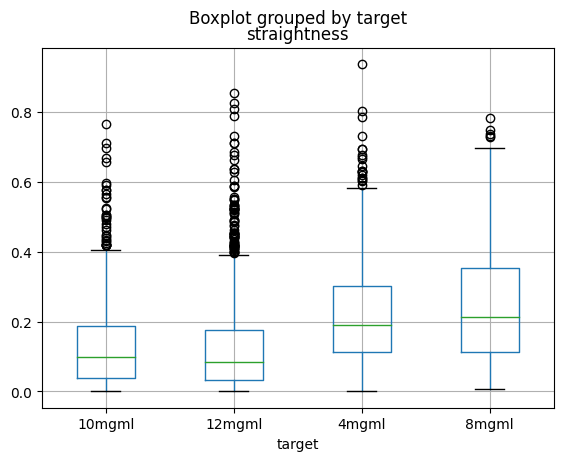

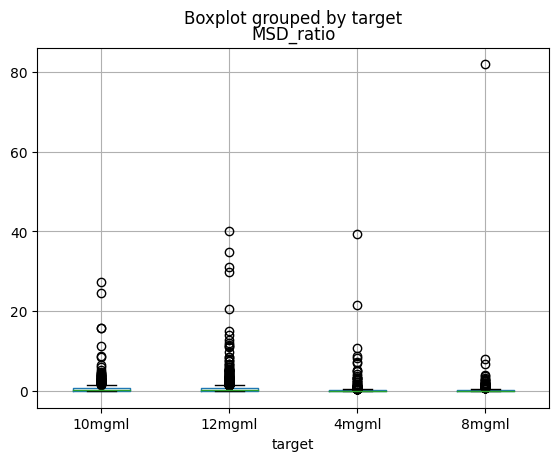

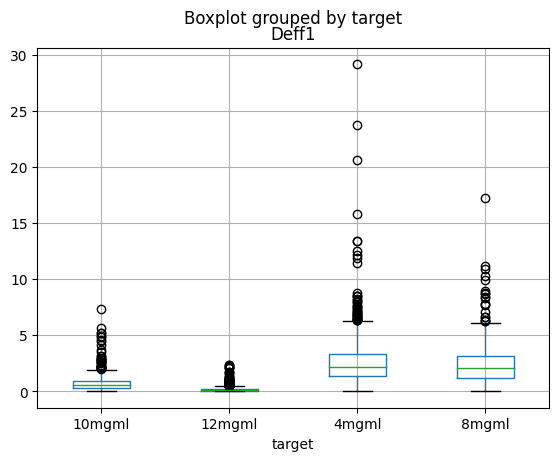

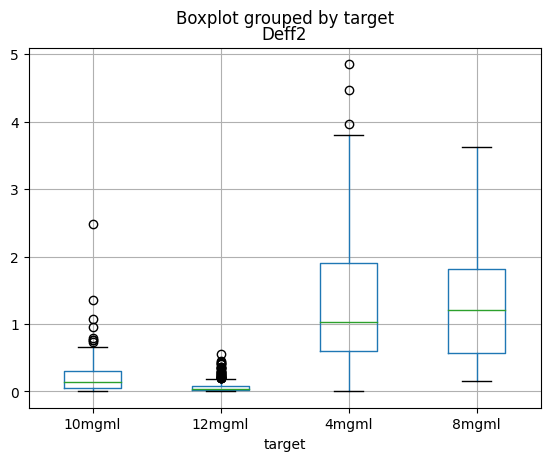

In [140]:
for feature in feature_list:
    all_df_cleaned.boxplot(feature, by='target')

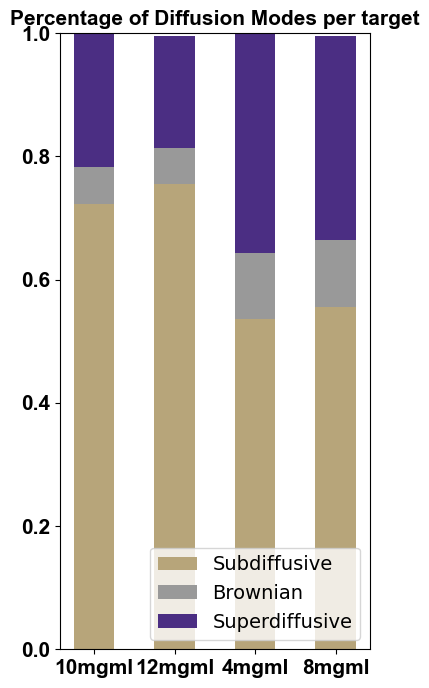

In [123]:
fig = diffusion_modes.plot_diffusion_modes(all_df, 'target')

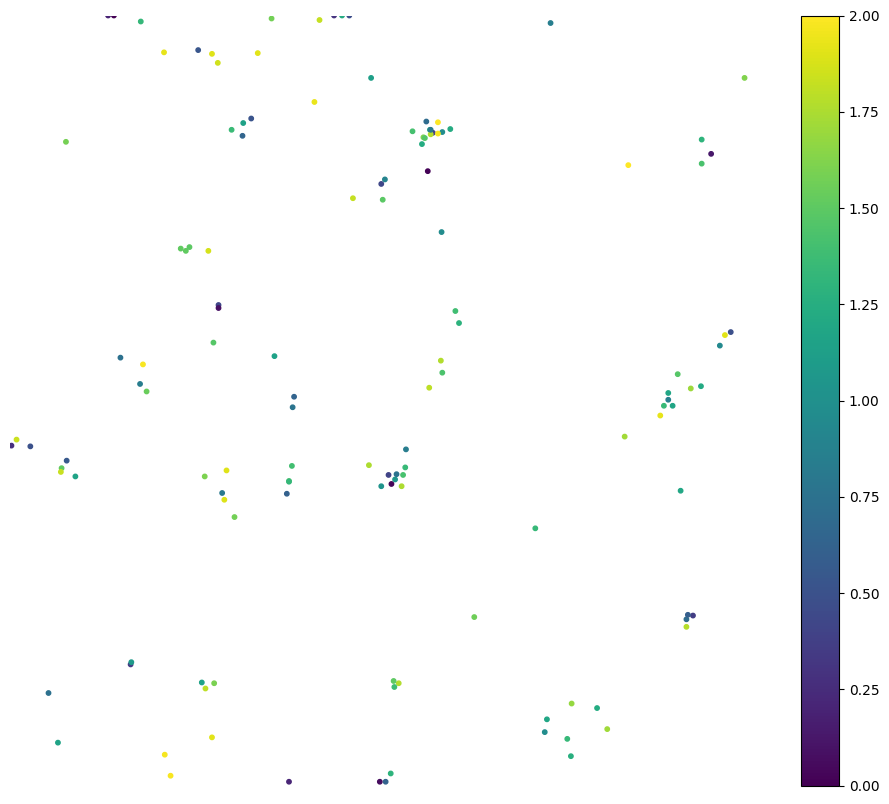

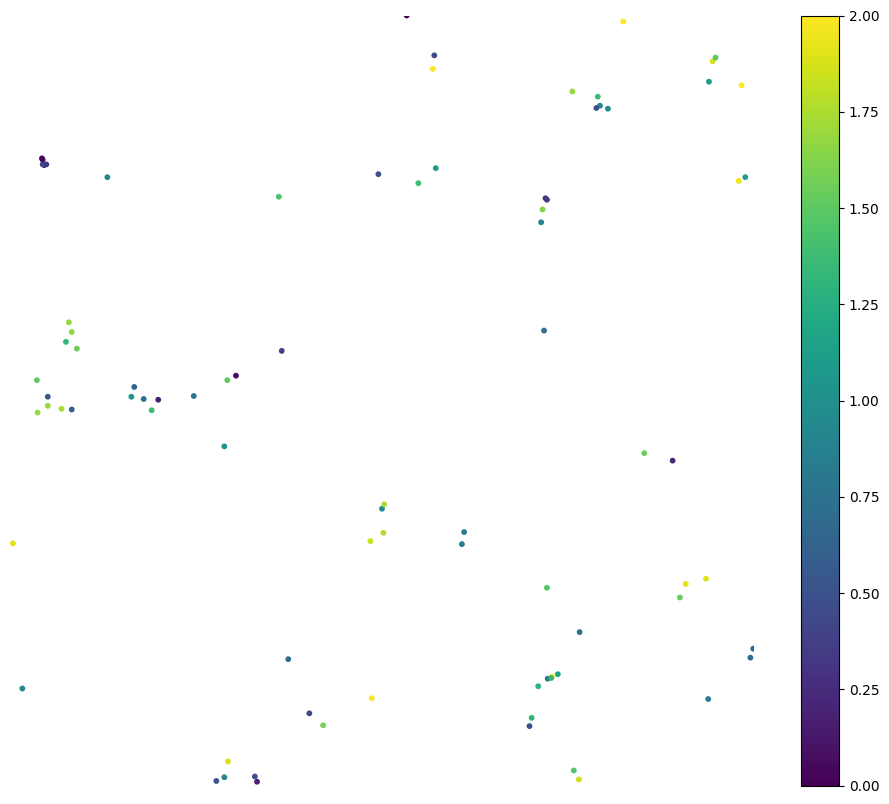

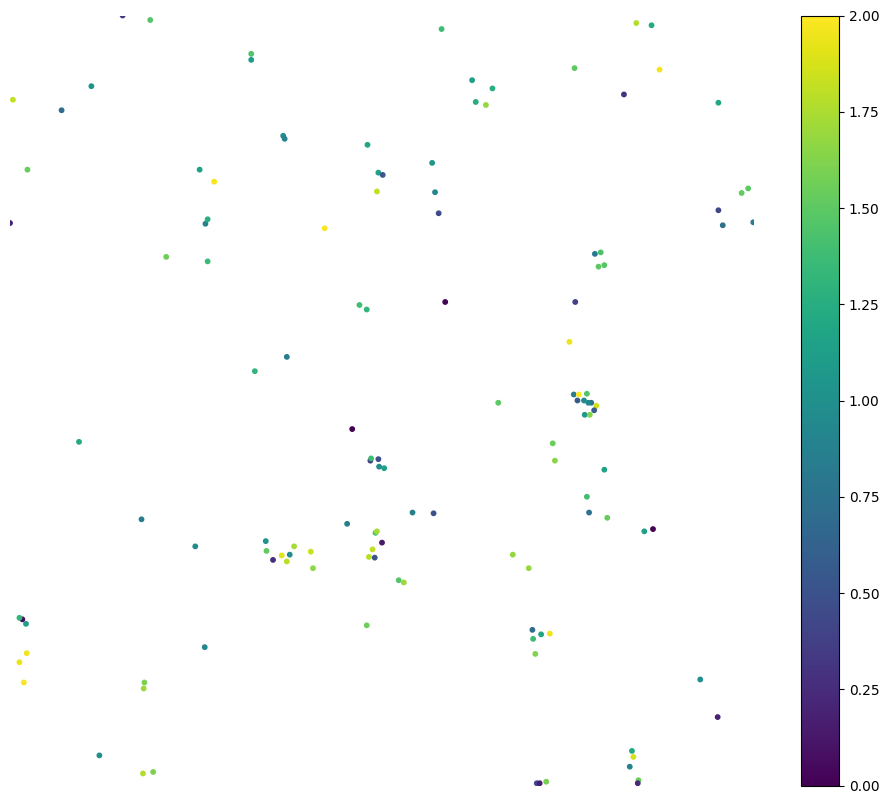

In [150]:
for file in feature_agarose_4:
    file = agarose_data_path + file
    df = pd.read_csv(file)
    fig = plot_scatterplot(df, 'Deff1', resolution=256, vmin=0, vmax=2)

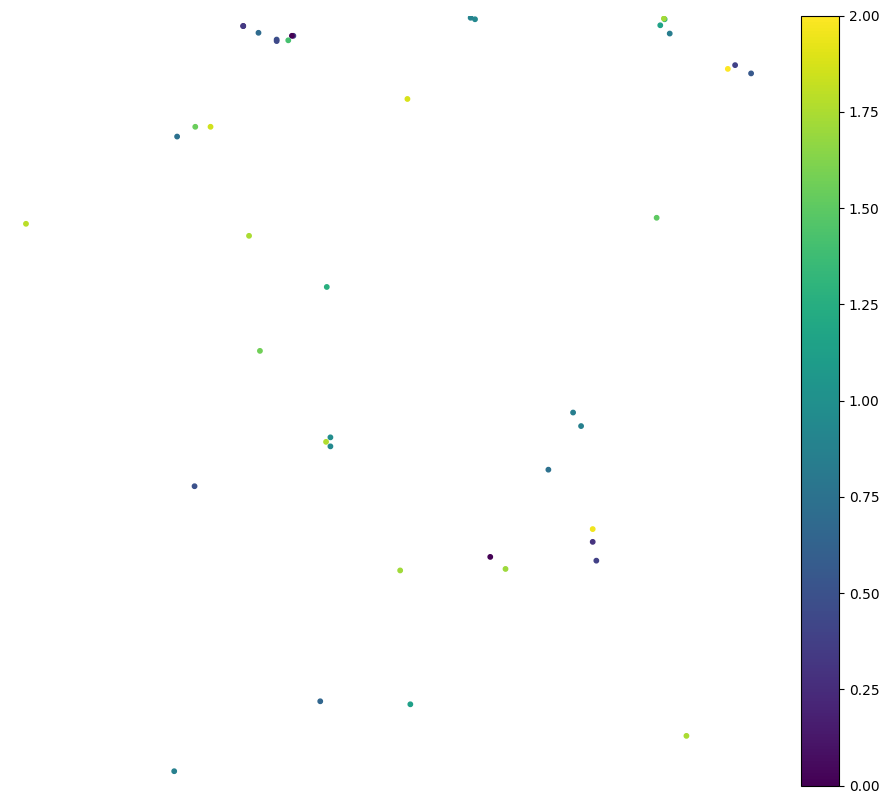

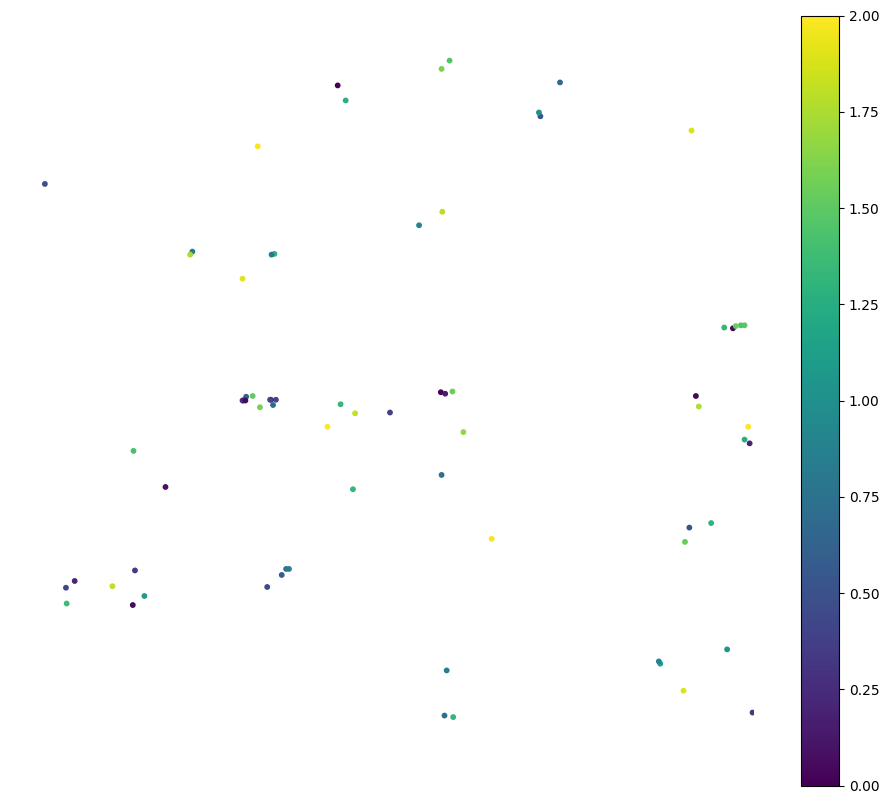

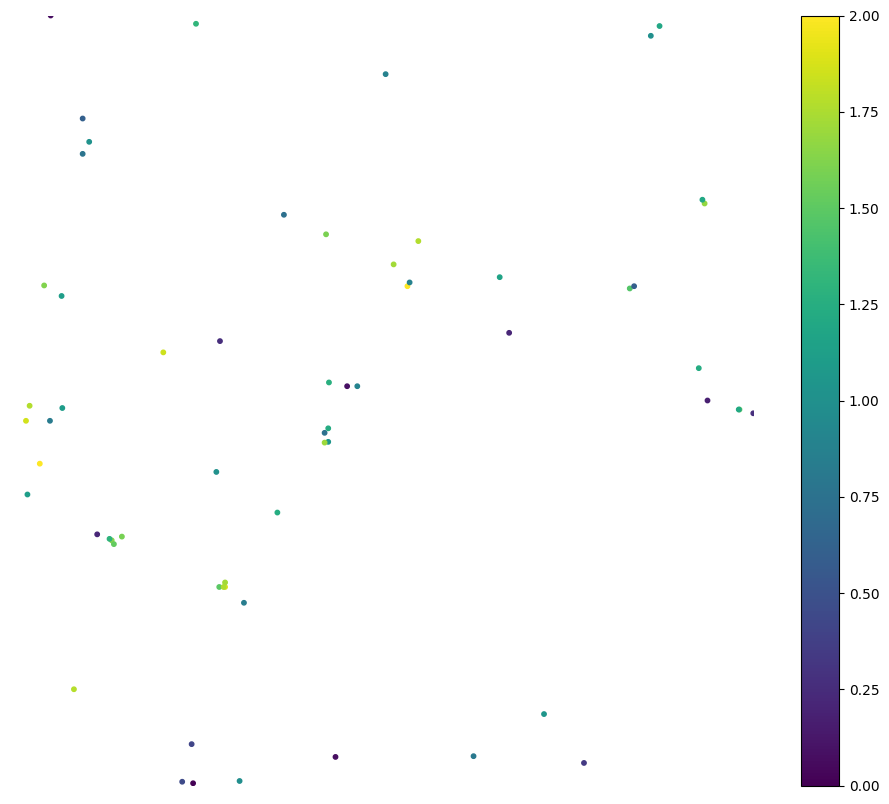

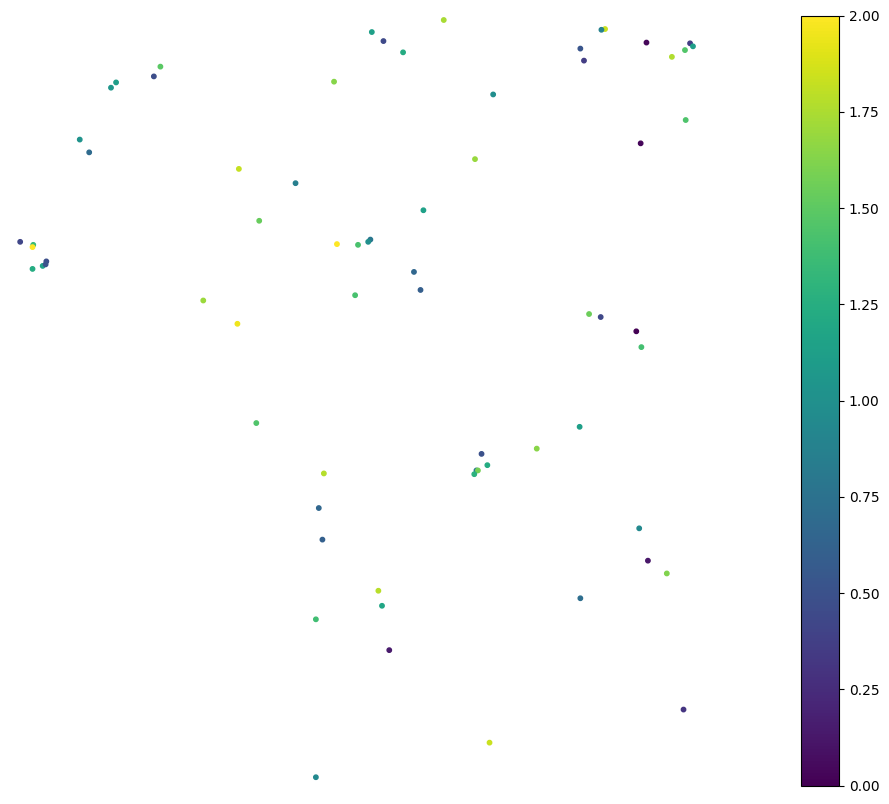

In [151]:
for file in feature_agarose_8:
    file = agarose_data_path + file
    df = pd.read_csv(file)
    fig = plot_scatterplot(df, 'Deff1', resolution=256, vmin=0, vmax=2)

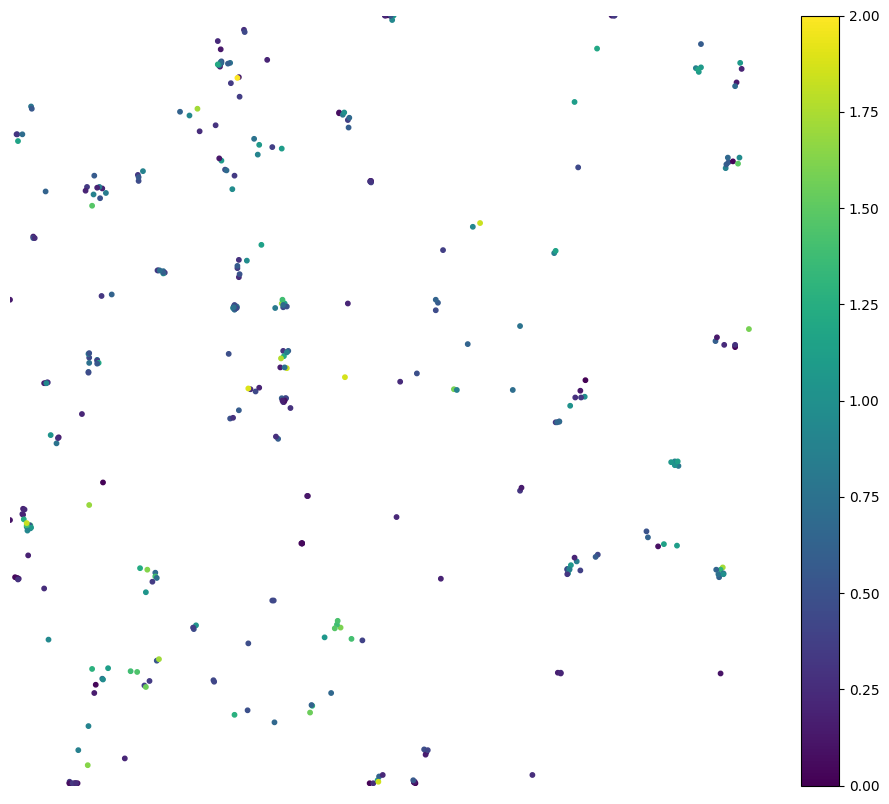

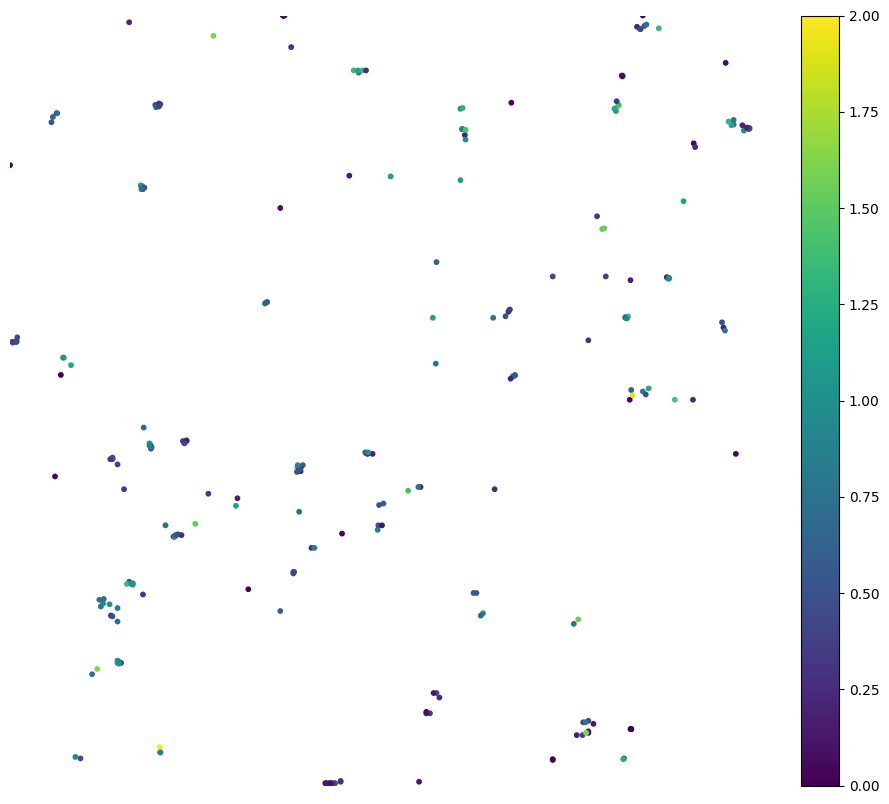

In [152]:
for file in feature_agarose_10:
    file = agarose_data_path + file
    df = pd.read_csv(file)
    fig = plot_scatterplot(df, 'Deff1', resolution=256, vmin=0, vmax=2)

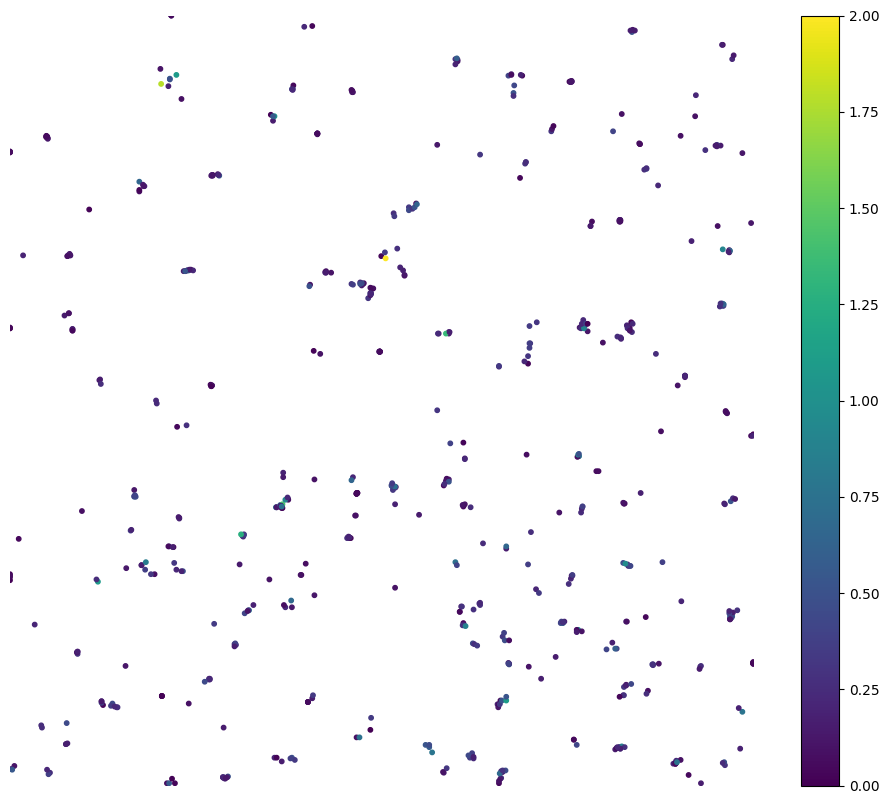

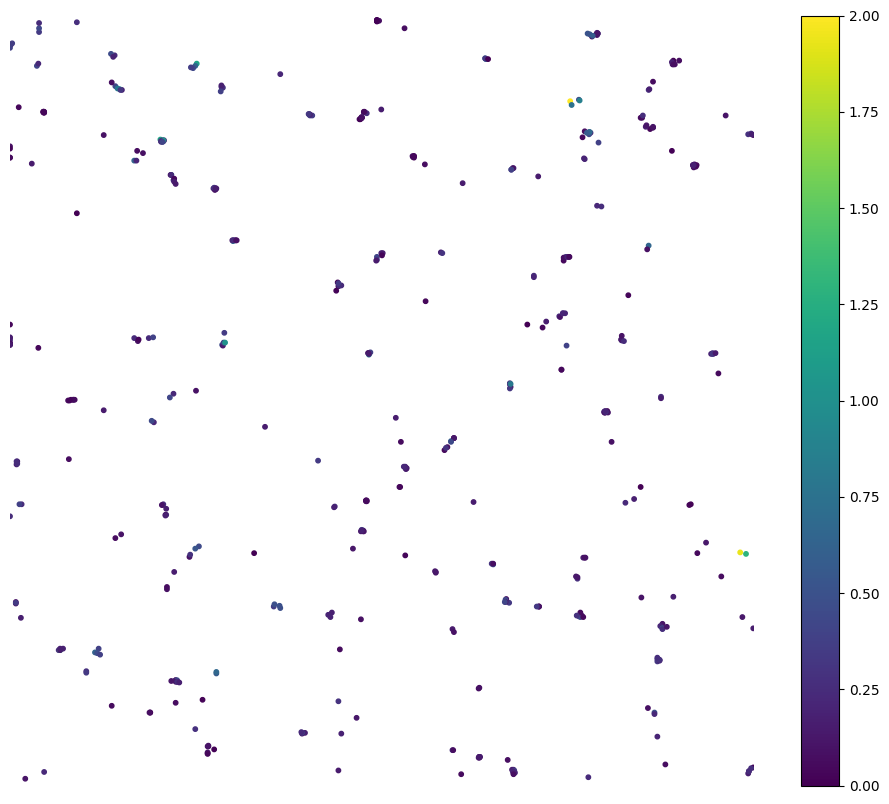

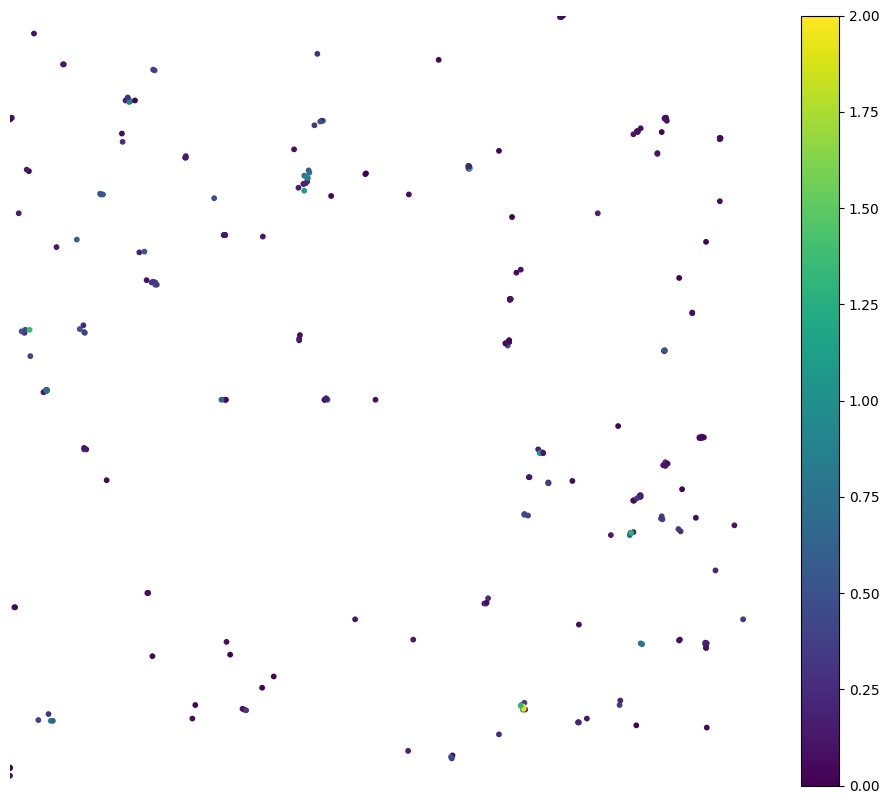

In [153]:
for file in feature_agarose_12:
    file = agarose_data_path + file
    df = pd.read_csv(file)
    fig = plot_scatterplot(df, 'Deff1', resolution=256, vmin=0, vmax=2)